# K-Means

## import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read Dataset

In [2]:
dataset = pd.read_csv("Data/Iris.csv")

dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset.shape

(150, 6)

In [4]:
dataset["Species"].replace(to_replace = {'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2}, inplace=True)

dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


## Pair Plot

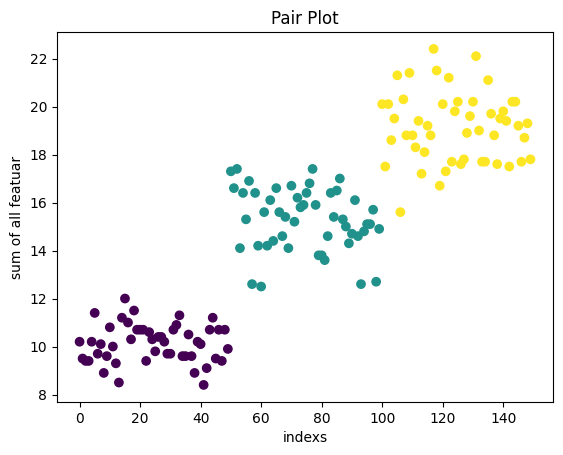

In [5]:
plt.style.use("default") # fivethirtyeight

plt.scatter(dataset.index, dataset.iloc[:, 1:11].sum(axis=1), c=dataset["Species"])

plt.title("Pair Plot")
plt.xlabel("indexs")
plt.ylabel("sum of all featuar")

plt.show()

<AxesSubplot: xlabel='Species'>

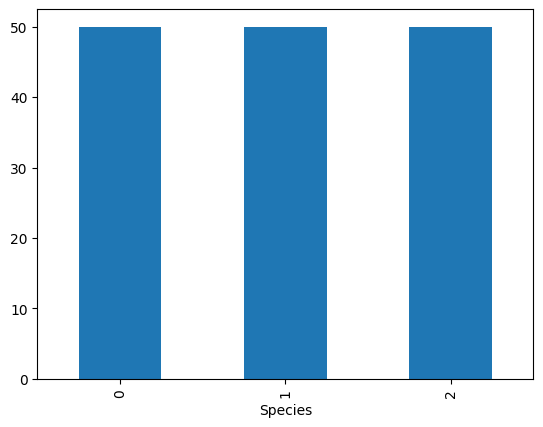

In [6]:
dataset.groupby('Species')['Species'].count().plot(kind='bar')

In [7]:
X = dataset[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
Y = dataset["Species"]

X, Y = X.to_numpy(), Y.to_numpy()

## Building The Model

In [10]:
np.random.seed(42)

class K_Means:
    
    def __init__(self, K=5, max_iterations=100, plot_steps=False):
        self.K = K
        self.max_iterations = max_iterations
        self.plot_steps = plot_steps
        self.distances = self._euclidean_distances
        
        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        
        # mean feature vector for each cluster
        self.centroids = []
      
    
    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # init ialize centroids
        random_samples_idxs = np.random.choice(self.n_samples, size=self.K, replace=True)
        self.centroids = [X[idx] for idx in random_samples_idxs]
        
        # opzimization
        for _ in range(self.max_iterations):
            # update cluster
            self.clusters = self._create_cluster(self.centroids)
            
            if self.plot_steps:
                self.plot()
            
            # update centroids
            old_centroids = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            # check if converged
            if self._is_converged(old_centroids, self.centroids):
                break
                
            if self.plot_steps:
                self.plot()
            
        # return cluster label
        return self._get_cluster_label(self.clusters)
    
    def _euclidean_distances(self, x_1, x_2):
        euclidean_distances = np.sqrt(np.sum((x_2 - x_1) ** 2))
        return euclidean_distances
    
    def most_common(self, values):
        values = list(values)
        most_common =  max(set(values), key=values.count)
        return most_common
    
    def _create_cluster(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    
    def _closest_centroid(self, sample, centroids):
        distances = [self.distances(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx
    
    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids 
    
    def _is_converged(self, old_centroids, new_centroids):
        distances = [self.distances(old_centroids[i], new_centroids[i]) for i in range(self.K)]
        return sum(distances) == 0
    
    def _get_cluster_label(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels
    
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()

(500, 2)
3


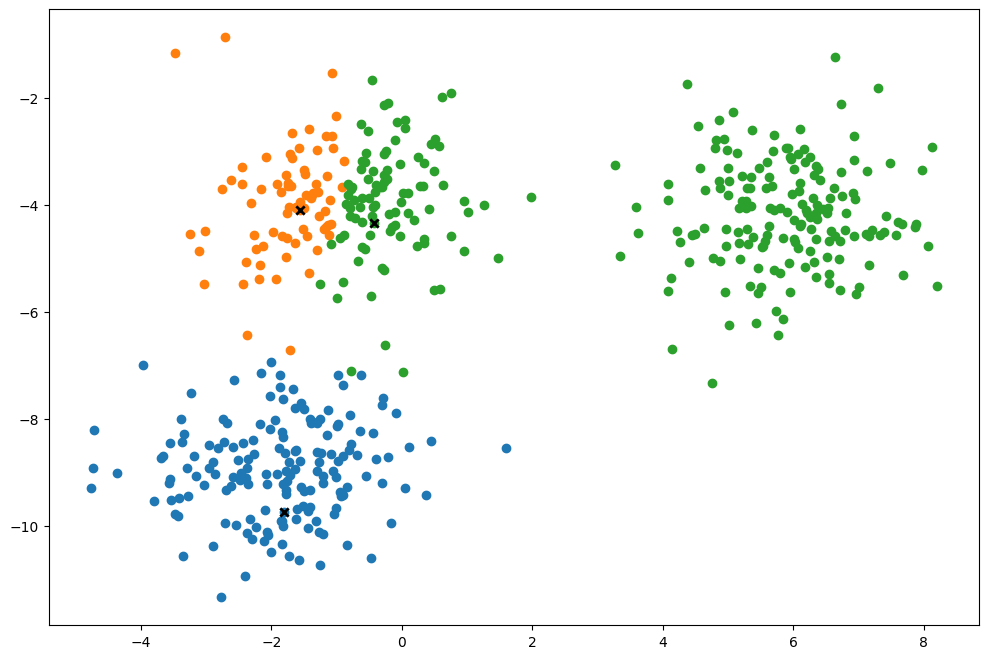

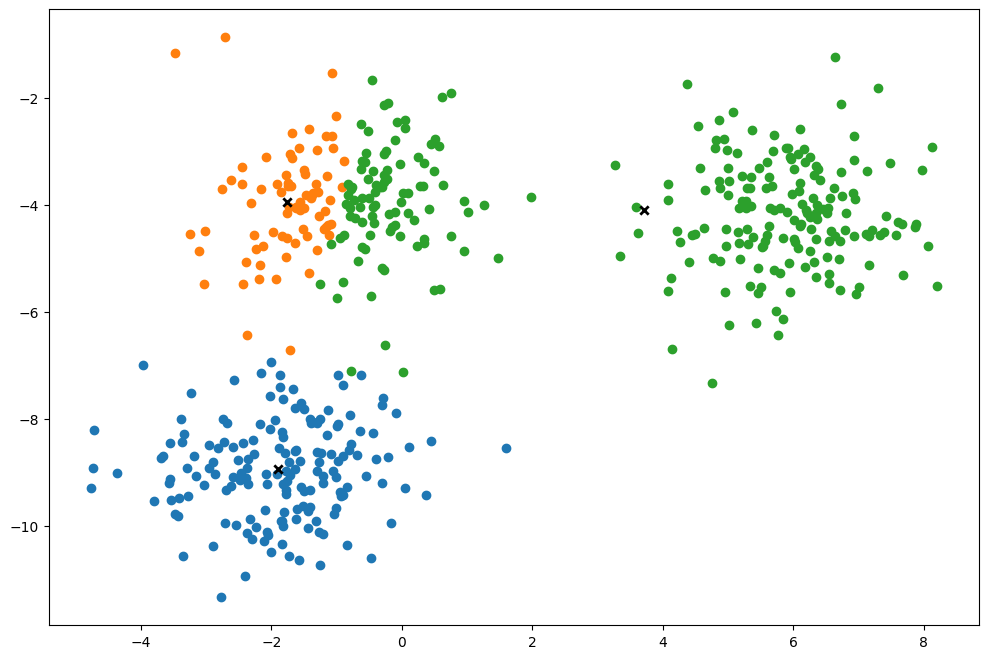

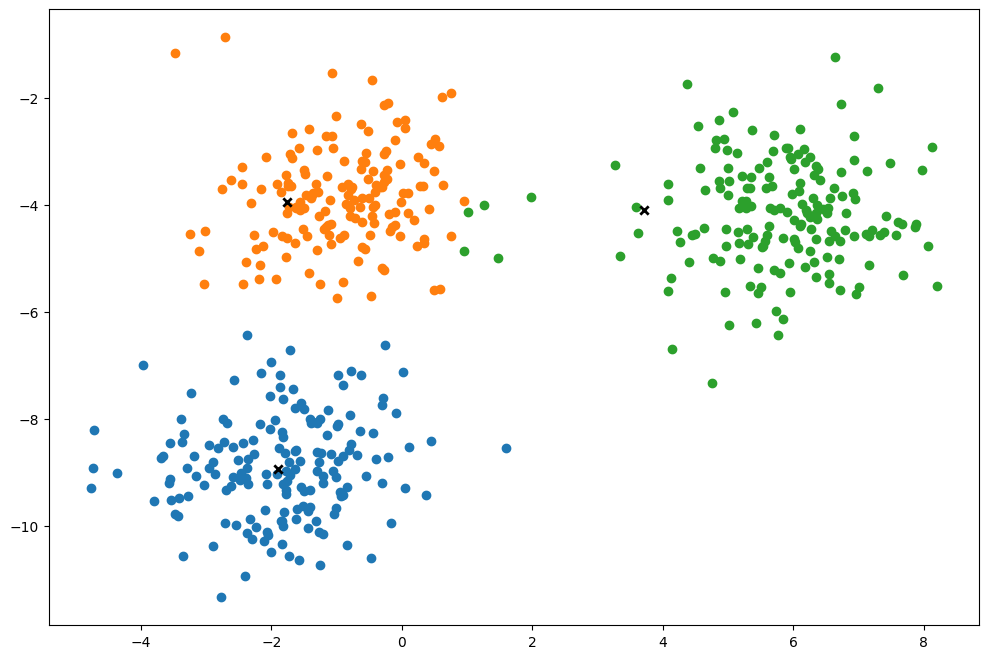

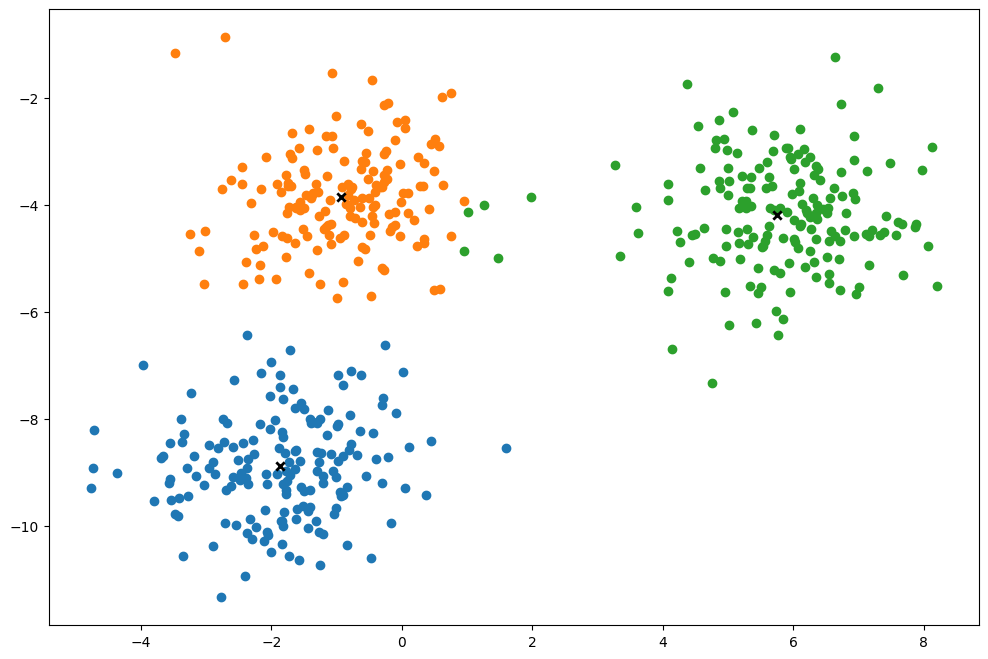

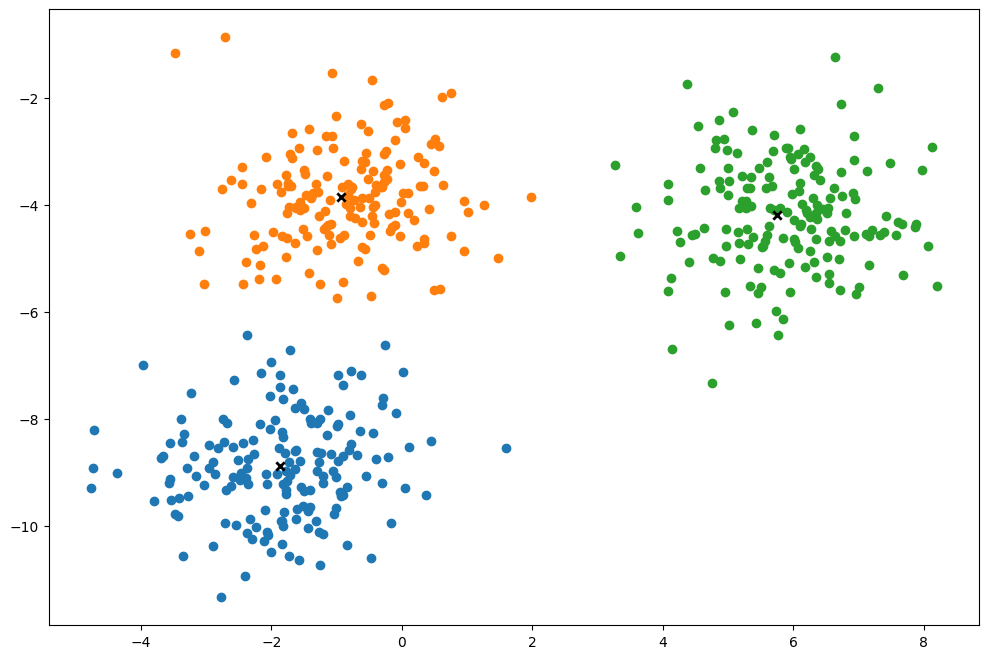

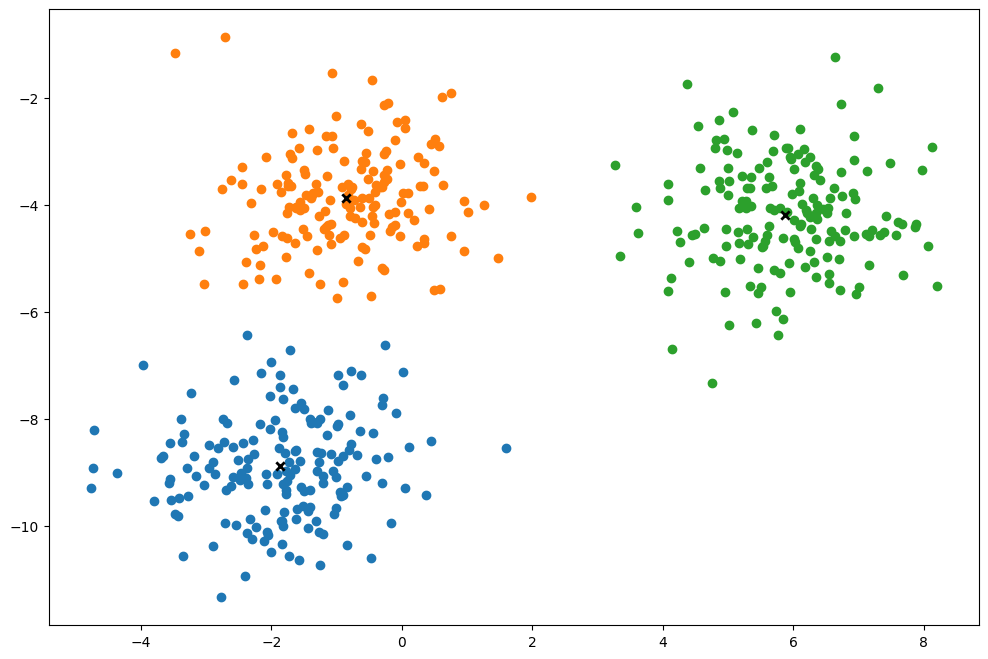

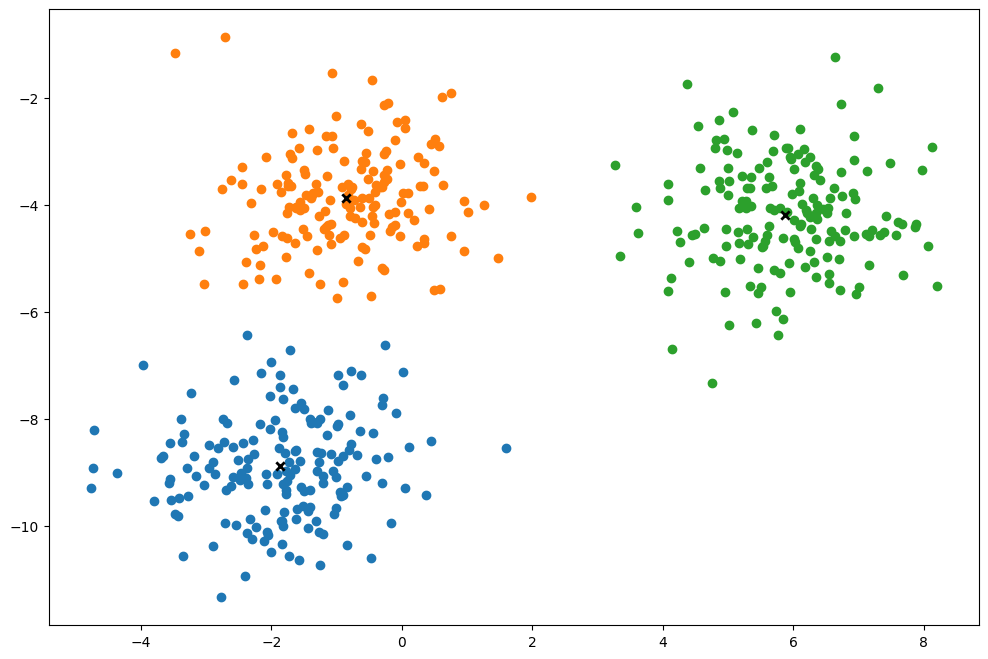

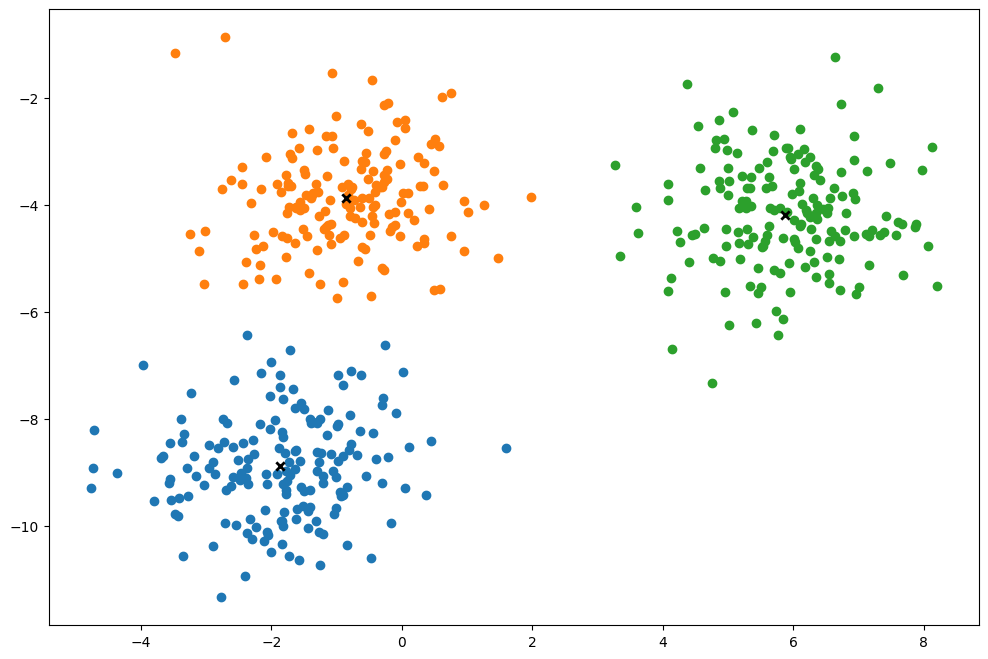

In [13]:
print(X.shape)

clusters = len(np.unique(Y))
print(clusters)

KMeans = K_Means(K=clusters, max_iterations=150, plot_steps=True)
y_pred = KMeans.predict(X)

KMeans.plot()